In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-fine-food-reviews/hashes.txt
/kaggle/input/amazon-fine-food-reviews/Reviews.csv
/kaggle/input/amazon-fine-food-reviews/database.sqlite


In [2]:
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('../input/amazon-fine-food-reviews/Reviews.csv')
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [5]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [6]:
df['Helpful%']=np.where(df['HelpfulnessDenominator']>0,df['HelpfulnessNumerator']/df['HelpfulnessDenominator'],-1)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful%
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0


In [7]:
df['Helpful%'].value_counts()

-1.000000    270052
 1.000000    183309
 0.000000     33774
 0.500000     21623
 0.666667     10514
              ...  
 0.876033         1
 0.893082         1
 0.179487         1
 0.924282         1
 0.265625         1
Name: Helpful%, Length: 952, dtype: int64

In [8]:
df['upvote%']=pd.cut(df['Helpful%'],bins=[-1,0,0.2,0.4,0.6,0.8,1], labels=['Empty','0-20%','20-40%','40-60%','60-80%','80-100%'])
df.head()                           #Bin labels must be one fewer than the number of bin edges

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful%,upvote%
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,NaN
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0,NaN


In [9]:
df.groupby(['Score','upvote%']).agg({'Id':'count'})

Id
Score upvote%        
1     Empty      8060
      0-20%      2338
      20-40%     4649
      40-60%     6586
      60-80%     5838
      80-100%   12531
2     Empty      4234
      0-20%       762
      20-40%     1618
      40-60%     3051
      60-80%     2486
      80-100%    7014
3     Empty      5062
      0-20%       474
      20-40%     1506
      40-60%     3384
      60-80%     2754
      80-100%   11037
4     Empty      4780
      0-20%       116
      20-40%      909
      40-60%     3185
      60-80%     2941
      80-100%   26707
5     Empty     11638
      0-20%       432
      20-40%     2275
      40-60%    10312
      60-80%    11060
      80-100%  140661

In [10]:
df_s=df.groupby(['Score','upvote%']).agg({'Id':'count'}).reset_index()
pivot = df_s.pivot(index='upvote%',columns='Score')
pivot

Id                            
Score        1     2      3      4       5
upvote%                                   
Empty     8060  4234   5062   4780   11638
0-20%     2338   762    474    116     432
20-40%    4649  1618   1506    909    2275
40-60%    6586  3051   3384   3185   10312
60-80%    5838  2486   2754   2941   11060
80-100%  12531  7014  11037  26707  140661

<AxesSubplot:xlabel='None-Score', ylabel='upvote%'>

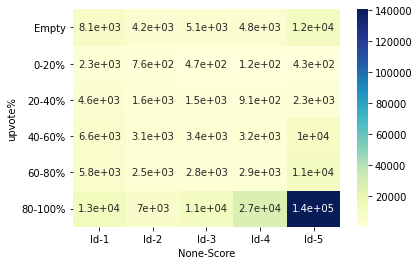

In [11]:
sns.heatmap(pivot, annot= True, cmap='YlGnBu')

More number of people had given positive ratings i.e. score=5

**Ignoring datapoints with score=3**

In [12]:
df2=df[df['Score']!=3]

**Splitting dataset into X and Y**

In [13]:
x=df2['Text']
y=df2['Score']

In [14]:
y_dict = {1:0,2:0,4:1,5:1}
y=df2['Score'].map(y_dict)


## Feature Extraction

### - Bag of Words

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
c = CountVectorizer(stop_words='english')                  # to ignore all english stopwords

In [17]:
x_c = c.fit_transform(x)

In [18]:
x_c.shape

(525814, 114969)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x_c,y)

### Logistic Regression on Bag of Words

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
log = LogisticRegression(solver='liblinear')

In [23]:
ml = log.fit(x_train, y_train)

In [24]:
ml.score(x_test,y_test)

0.9380163403167648

In [25]:
w = c.get_feature_names()
#w                      ['00','000','0000','000001','00001','000013','0000soo','0001', '000111052','0002251337','0003','0004',..........]

In [26]:
coef = ml.coef_.tolist()[0]
#coef           [-0.37943545710075455, -0.08398146812595073, 0.43943968799955097,......]

In [27]:
coef_df = pd.DataFrame({'Word':w, 'Coefficient':coef})
coef_df

,Word,Coefficient
0,00,-0.356075
1,000,0.098057
2,0000,0.779949
3,000001,0.000000
4,00001,-0.026896
...,...,...
114964,çaykur,0.001857
114965,çelem,-0.180591
114966,être,0.000000
114967,île,0.007142


In [28]:
coef_df=coef_df.sort_values(['Coefficient','Word'],ascending=False)

In [29]:
coef_df.head(20)

,Word,Coefficient
80600,pleasantly,2.920145
96145,solving,2.563920
20268,bertie,2.467199
39072,downside,2.436337
5865,addicting,2.381413
94680,skewed,2.357380
55029,hooked,2.285694
39214,drawback,2.254245
35726,delish,2.228296
40135,easiest,2.201362


In [30]:
coef_df.tail(20)

,Word,Coefficient
102845,terrible,-2.373911
56229,ick,-2.396970
38320,disturbed,-2.456680
23580,budda,-2.461826
2318,280mg,-2.478754
86421,redeeming,-2.491046
37563,disappointment,-2.540061
88351,returnable,-2.552161
38117,dissapointing,-2.556631
106894,unappealing,-2.583866


## Automating NLP model and ML model

In [31]:
def text_fit(x,y,nlp_model,ml_model,coef_show=1):
    x_c = nlp_model.fit_transform(x)
    print('No. of features:{}'.format(x_c.shape[1]))
    x_train,x_test,y_train,y_test = train_test_split(x_c,y)
    
    ml = ml_model.fit(x_train, y_train)
    acc = ml.score(x_test,y_test)
    print('Accuracy:{}'.format(acc))
    
    if coef_show==1:
        w = nlp_model.get_feature_names()
        coef = ml.coef_.tolist()[0]
        coef_df = pd.DataFrame({'Word':w, 'Coefficient':coef})
        coef_df=coef_df.sort_values(['Coefficient','Word'],ascending=False)
        print('\n')
        print('Top 20 Positive words:')
        print(coef_df.head(20))
        print('\n')
        print('Top 20 Negative words:')
        print(coef_df.tail(20))

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
c = CountVectorizer(stop_words='english') 

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
log = LogisticRegression(solver='liblinear')

In [36]:
text_fit(x,y,c,log)

No. of features:114969
Accuracy:0.9392487105755626


Top 20 Positive words:
              Word  Coefficient
80600   pleasantly     2.901190
39072     downside     2.523910
96145      solving     2.347325
53610     heartier     2.345079
55029       hooked     2.341608
94667    skeptical     2.277735
5865     addicting     2.261751
113138     worries     2.229099
103903      tigers     2.183764
110445       vouch     2.150815
20268       bertie     2.130315
114023     yielded     2.119226
52502       hahaha     2.053020
106942  unbeatable     2.037085
53585        hears     2.019810
105162     trainer     2.019569
87967       resist     2.007739
78033      patient     2.000215
63800    lifesaver     1.998136
40135      easiest     1.986304


Top 20 Negative words:
                  Word  Coefficient
67898         mediocre    -2.298183
47507           freind    -2.333049
24949        cancelled    -2.419932
88351       returnable    -2.444083
35220          defeats    -2.462557
37563   dis

### Automate predictions

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [38]:
def predict(x,y,nlp_model,ml_model):
    x_c = nlp_model.fit_transform(x)
    x_train,x_test,y_train,y_test = train_test_split(x_c,y)
    
    ml = ml_model.fit(x_train, y_train)
    predictions = ml.predict(x_test)
    cm = confusion_matrix(predictions, y_test)
    print('Confusion Matrix: \n{}'.format(cm))
    acc = accuracy_score(predictions,y_test)
    print('Accuracy:{}'.format(acc))

In [39]:
c= CountVectorizer()
lr = LogisticRegression(solver='liblinear')

In [40]:
predict(x,y,c,lr)

Confusion Matrix: 
[[ 15749   2576]
 [  4806 108323]]
Accuracy:0.9438434737626851


## TF-IDF 

In [42]:
from sklearn.dummy import DummyClassifier

In [43]:
c= CountVectorizer()
lr = LogisticRegression(solver='liblinear')

### Bag of Words and Dummy classifier

In [47]:
text_fit(x,y,c, DummyClassifier(),0)

No. of features:115282
Accuracy:0.7339525613522601


In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [46]:
tfidf = TfidfVectorizer(stop_words='english')

### TF-IDF and Logistic Regression

In [48]:
text_fit(x,y,tfidf,lr,0)

No. of features:114969
Accuracy:0.935414669770414


In [51]:
predict(x,y,tfidf,lr)

Confusion Matrix: 
[[ 14215   2304]
 [  6324 108611]]
Accuracy:0.93436487288329


*Use other ML models like KNN, random forest, Naive Bayes etc.*

## Data preparation for modelling purpose

In [53]:
data = df[df['Score']==5]
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful%,upvote%
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0,NaN
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,-1.0,NaN
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,-1.0,NaN
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,1.0,80-100%


In [55]:
data['upvote%'].unique()

['80-100%', NaN, '60-80%', 'Empty', '40-60%', '20-40%', '0-20%']
Categories (6, object): ['Empty' < '0-20%' < '20-40%' < '40-60%' < '60-80%' < '80-100%']

In [60]:
# removing neutral votes i.e. 40-60%
data2 = data[data['upvote%'].isin(['80-100%', '60-80%', '20-40%', '0-20%'])]
data2.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful%,upvote%
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,1.0,80-100%
10,11,B0001PB9FE,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...,1.0,80-100%
11,12,B0009XLVG0,A2725IB4YY9JEB,"A Poeng ""SparkyGoHome""",4,4,5,1282867200,"My cats LOVE this ""diet"" food better than thei...",One of my boys needed to lose some weight and ...,1.0,80-100%
14,15,B001GVISJM,A2MUGFV2TDQ47K,"Lynrie ""Oh HELL no""",4,5,5,1268352000,Strawberry Twizzlers - Yummy,The Strawberry Twizzlers are my guilty pleasur...,0.8,60-80%


**This is exactly the dataframe that we require for modelling purpose**

In [62]:
x = data2['Text']

In [63]:
data2['upvote%'].unique()

['80-100%', '60-80%', '20-40%', '0-20%']
Categories (4, object): ['0-20%' < '20-40%' < '60-80%' < '80-100%']

In [79]:
y_dict = {'80-100%':1, '60-80%':1, '20-40%':0, '0-20%':0}
y = data2['upvote%'].map(y_dict)
y.value_counts()

1.0    151721
0.0      2707
Name: upvote%, dtype: int64

*It is an imbalance data*

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [81]:
tf = TfidfVectorizer()

In [82]:
x_c = tf.fit_transform(x)

### Applying techniques to handle imbalance data

#### Random Over Sample technique

In [83]:
#!pip install TensorFlow

In [84]:
from imblearn.over_sampling import RandomOverSampler     #it uses tensorflow in backend

In [85]:
os = RandomOverSampler()

In [86]:
x_train_res, y_train_res = os.fit_resample(x_c,y)

In [87]:
x_train_res.shape

(303442, 67507)

In [88]:
y_train_res.shape

(303442,)

In [92]:
y_train_res.value_counts()

0.0    151721
1.0    151721
Name: upvote%, dtype: int64

In [90]:
# to check imbalance in data, so to print of all classes in data
from collections import Counter

In [93]:
print('Original dataset shape {}'.format(Counter(y)))
print('Original dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({1.0: 151721, 0.0: 2707})
Original dataset shape Counter({1.0: 151721, 0.0: 151721})


### Doing Cross validation using Grid Search technique and then doing predictions

In [94]:
from sklearn.linear_model import LogisticRegression

In [96]:
log_class = LogisticRegression(solver='liblinear')

In [98]:
np.arange(-2,3)

array([-2, -1,  0,  1,  2])

In [99]:
grid = {'C': 10.0**np.arange(-2,3), 'penalty':['l1','l2']}

In [97]:
from sklearn.model_selection import GridSearchCV

In [100]:
clf  = GridSearchCV(estimator=log_class,param_grid=grid,cv=5,n_jobs=-1,scoring='f1_macro')

In [109]:
clf.fit(x_train_res, y_train_res)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
x_train,x_test,y_train,y_test = train_test_split(x_c,y)

In [112]:
pred = clf.predict(x_test)

In [113]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [114]:
confusion_matrix(y_test,pred)

array([[  689,     0],
       [   11, 37907]])

In [115]:
accuracy_score(y_test,pred)

0.9997150775766053